# A Short Introduction to `matplotlib.pyplot`

Matplotlib is a versatile Python plotting library used to create data visualizations. Pyplot, a module within Matplotlib, offers an interface that simplifies the creation and customization of plots with functions like `plot()`, `scatter()`, and `hist()`.

Learning Matplotlib is useful because it provides a solid foundation in data visualization, is highly customizable, and remains widely used in scientific and academic communities.

We start by importing the module `matplotlib.pyplot` under the alias `plt` as is standard convention.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## 1. Basic Plotting

To demonstrate basic use, let us create an evenly spaced grid of $50$ points on the interval $[0, 4\pi]$, and compute the values $\sin(x)$ and $\cos(x)$ on these points. We also compute the y-values of the line $y=0.05x-0.25$.

In [43]:
X = np.linspace(0, 4 * np.pi, 50)
y_cos = np.cos(X)
y_sin = np.sin(X)
y_line = 0.05 * X - 0.25

Calling `plt.plot(X, y_cos)`, we can plot the graph of $\cos(x)$. Calling `plt.show()` is not always needed when working in Jupyter notebooks, but it is needed everywhere else, so it is good practice to always call it.

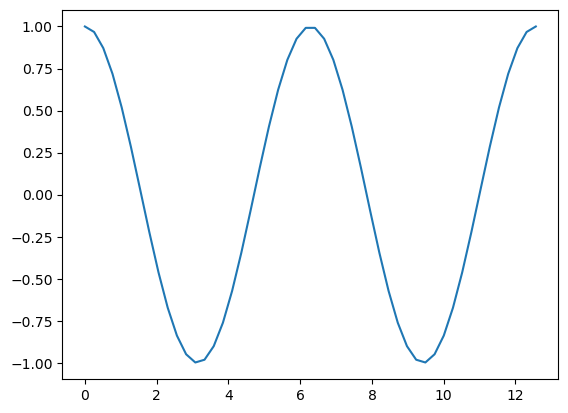

In [44]:
plt.plot(X, y_cos)
plt.show()

Here is an example demonstrating some ways in which you can customize your plots. The `label` keyword is particularly useful as this allows you to show the legend. Furthermore, remember to **always add labels to your axes** so that other people can understand your visualization!

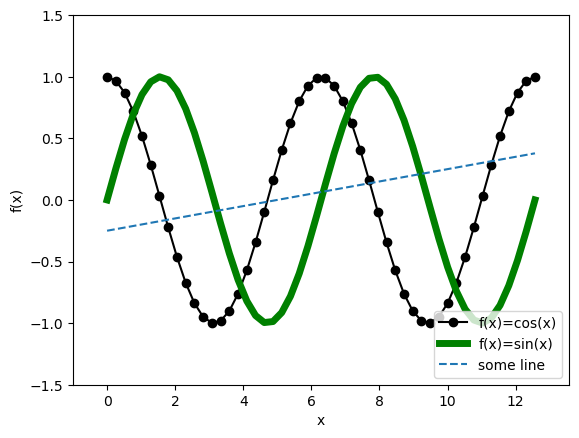

In [45]:
# Plot the three functions / arrays with different stylings
plt.plot(X, y_cos, label="f(x)=cos(x)", c="black", marker="o")  # marker="o" adds a bulletpoint marker on each data point
plt.plot(X, y_sin, label="f(x)=sin(x)", c="green", linewidth=5) # linewidth=5 gives us a thicker line
plt.plot(X, y_line, linestyle="--", label="some line") # Plot as a dashed line

# Set axes labels (always do this in your reports)
plt.xlabel("x")
plt.ylabel("f(x)")

# Set axes ranges
plt.ylim(-1.5, 1.5)
plt.xlim(-1, 4 * np.pi + 1)

plt.legend(loc="lower right") # Show legend (based on labels) in the lower right corner
plt.show()

## 2. Scatter Plots

A scatter plot is a type of graph that uses dots to represent values of two different variables, allowing visualization of the relationship between them. To create a scatter plot, use the function `plt.scatter(X, Y)` where `X` contains the x-values and `Y` contains the y-values of the points you want to plot.

Here we generate a noisy circular point cloud `X` consisting of $25$ points in $\mathbb{R}^2$, i.e., a NumPy array of shape `(25, 2)`.

(25, 2)


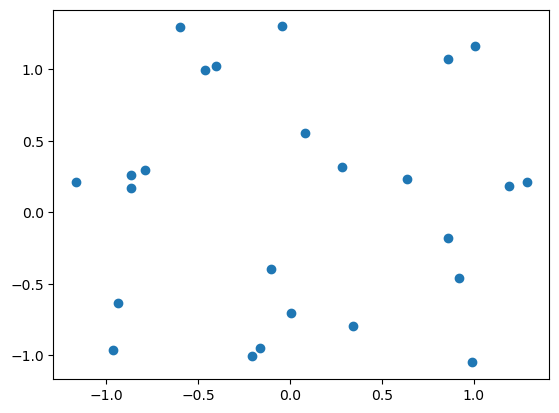

In [46]:
grid = np.linspace(0, 2 * np.pi, 25)
X = np.c_[np.cos(grid), np.sin(grid)] + 0.3 * np.random.standard_normal(size=(25, 2))
print(X.shape)

plt.scatter(X[:, 0], X[:, 1]) # Alternatively, plt.scatter(*X.T) does the same thing using unpacking of the transposed data matrix
plt.show()

Let us assign a random label to each point. Each label is an integer between $0$ and $3$ and we color the point depending on its label using the `c=` argument of `plt.scatter()`. 

We also set the size of each point based on the Euclidean distance from the origin using `np.linalg.norm()` to compute the distance and the `s=` argument of `plt.scatter()` to set the size.

In total, this plot visualizes four dimensions using the x and y coordinates, and the color and size of a point.

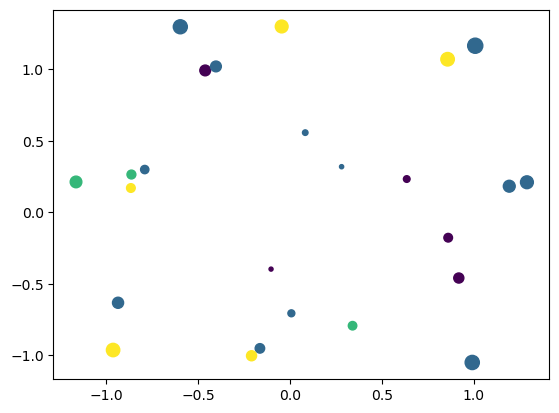

In [48]:
labels = np.random.randint(0, 4, size=(25, 1))
sizes = 50 * np.linalg.norm(X, axis=-1) ** 2

plt.scatter(*X.T, c=labels, s=sizes)
plt.show()

## 3. Bar Plots and Histograms

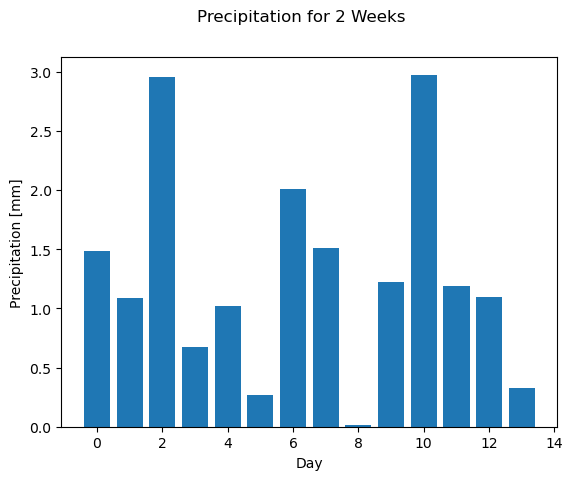

In [34]:
# Create random dummy data
categories = np.arange(0, 14)
heights = np.random.standard_exponential(14)

# Plot data using a bar plot
plt.suptitle("Precipitation for 2 Weeks")
plt.xlabel("Day")
plt.ylabel("Precipitation [mm]")
plt.bar(categories, heights)
plt.show()

A histogram is a type of bar plot that represents the distribution of a dataset by grouping data into bins and plotting the frequency of data points within each bin. It is useful to represent the distribution of your data.

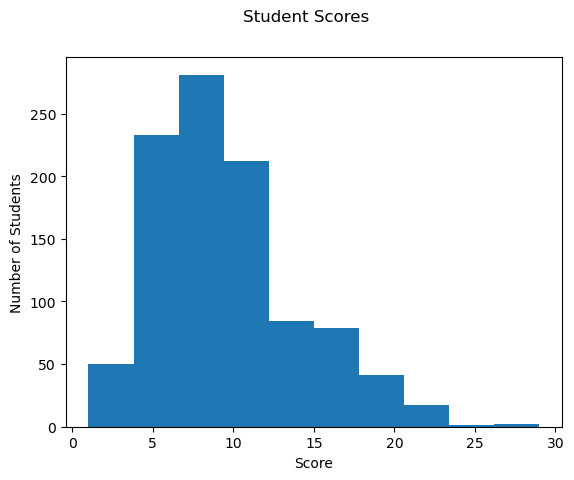

In [36]:
# Create random dummy data
data = np.random.chisquare(10, size=(1000, )).astype(np.int_)

# Plot histogram visualizing the data
plt.suptitle("Student Scores")
plt.xlabel("Score")
plt.ylabel("Number of Students")
plt.hist(data)
plt.show()

## 4. Multiple Plots (Subplots)

Using the function `plt.subplots()` with the keywords `ncols` and `nrows` to specify the number of columns and rows, we can have multiple subplots in a single plot.

Writing `fig, axs = plt.subplots(ncols=2, nrows=3)` creates a plot with three rows and two columns giving us a total of six subplots. We index the `axs` variable to access the different subplots.

This is maybe best illustrated by an example. The following example include three plots side-by-side.

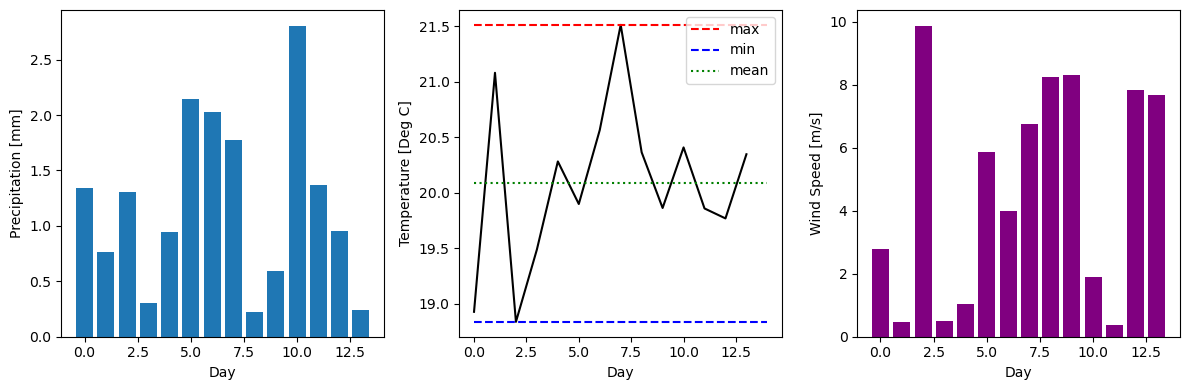

In [68]:
# Create random dummy data
day_numbers = np.arange(0, 14)
precipitation = np.random.standard_exponential(size=14)
temperature = np.random.normal(20, 1, size=14)
wind_speed = np.random.uniform(0, 10, size=14)

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 4))

# Add plot for precipitation data
axs[0].set_xlabel("Day")
axs[0].set_ylabel("Precipitation [mm]")
axs[0].bar(day_numbers, precipitation)

# Add plot for temperature data
axs[1].set_xlabel("Day")
axs[1].set_ylabel("Temperature [Deg C]")
axs[1].plot(day_numbers, temperature, color="black")
# Add lines showing the minimum, mean and maximum temperatures
max_temp = np.max(temperature)
min_temp = np.min(temperature)
mean_temp = np.mean(temperature)
axs[1].hlines(max_temp, 0, 14, color="red", label="max", linestyle="dashed")
axs[1].hlines(min_temp, 0, 14, color="blue", label="min", linestyle="dashed")
axs[1].hlines(mean_temp, 0, 14, color="green", label="mean", linestyle="dotted")
axs[1].legend()

# Add plot for wind speed data
axs[2].set_xlabel("Day")
axs[2].set_ylabel("Wind Speed [m/s]")
axs[2].bar(day_numbers, wind_speed, color="purple")

fig.tight_layout() # Useful if plots overlap eachother and to make everything fit nicely
plt.show()

If we want to have both multiple rows and columns, we need to index `axs` with two indices as shown in the following example.

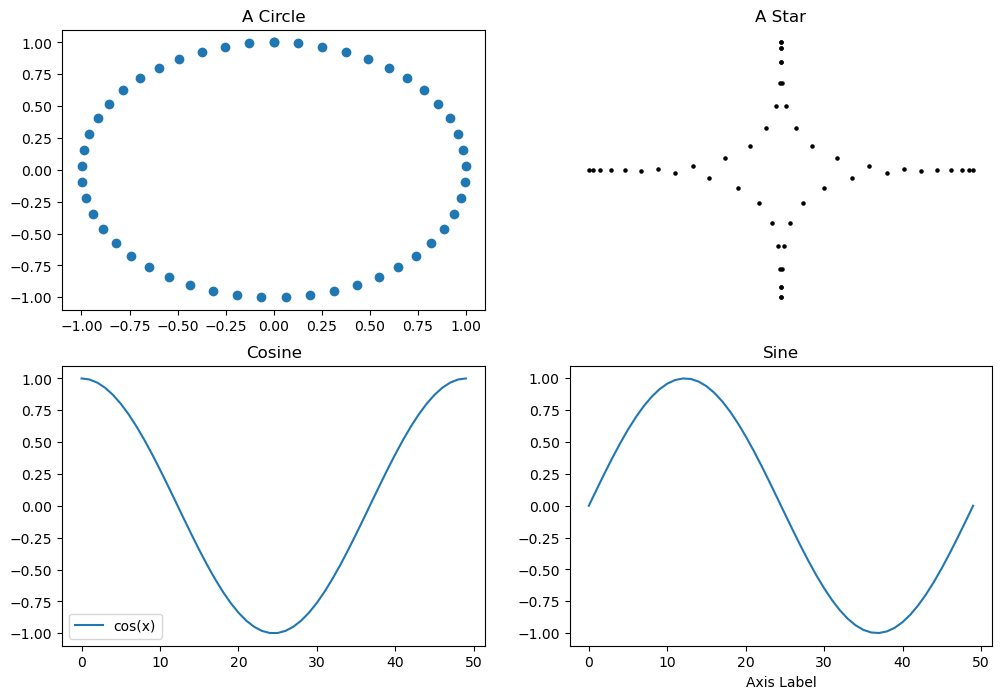

In [48]:
# Create some dummy data
grid = np.linspace(0, 2 * np.pi, 50)
X1 = np.c_[np.sin(grid), np.cos(grid)]
X2 = np.c_[np.sin(grid) ** 5, np.cos(grid) ** 5]
X3 = np.cos(grid)
X4 = np.sin(grid)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12,8))

# Upper left plot
axs[0, 0].set_title("A Circle")
axs[0, 0].scatter(*X1.T)

# Upper right
axs[0, 1].set_title("A Star")
axs[0, 1].scatter(*X2.T, c="black", s=5)
axs[0, 1].axis("off") # Hide axes

# Lower left
axs[1, 0].set_title("Cosine")
axs[1, 0].plot(X3, label="cos(x)")
axs[1, 0].legend() # Add legend to plot

# Lower right
axs[1, 1].set_title("Sine")
axs[1, 1].set_xlabel("Axis Label") # Add x-axis label
axs[1, 1].plot(X4)

plt.show()

## 5. Other Stuff

- Saving plots to file (dpi)
- 3D plots?
- Plotting Images